In [1]:
# 필요 라이브러리 로드
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform
# 정규식
import re

In [2]:
weather_df = pd.read_csv("weather_df.csv")
weather_df.drop(columns='Unnamed: 0', inplace=True)
weather_df

,year,month,temp,Humidity_mean,rainfall_total,cloud,solar,snow
0,2016,1,0.9,69,49.7,6.0,244.83,13.5
1,2016,2,3.3,60,45.2,4.5,348.22,5.6
2,2016,3,8.4,60,55.2,4.1,520.95,0.0
3,2016,4,15.5,66,185.0,5.8,541.64,0.0
4,2016,5,19.8,65,104.5,5.2,681.60,0.0
...,...,...,...,...,...,...,...,...
79,2022,8,26.9,90,106.4,7.3,454.30,0.0
80,2022,9,23.1,77,89.2,6.2,483.16,0.0
81,2022,10,16.0,65,38.3,4.0,459.57,0.0
82,2022,11,11.8,62,46.7,3.9,336.75,0.0


In [3]:
power_kw_df = pd.read_csv("power_usage.csv")
power_kw_df.drop(columns='Unnamed: 0', inplace=True)
power_kw_df

,year,month,usage
0,2016,1,753434128
1,2016,2,756942825
2,2016,3,714022910
3,2016,4,675078079
4,2016,5,630983018
...,...,...,...
79,2022,8,892014835
80,2022,9,806887743
81,2022,10,691579483
82,2022,11,690524525


In [4]:
kw_df = pd.merge(weather_df, power_kw_df, how='left', on=['year', 'month'])
kw_df

,year,month,temp,Humidity_mean,rainfall_total,cloud,solar,snow,usage
0,2016,1,0.9,69,49.7,6.0,244.83,13.5,753434128
1,2016,2,3.3,60,45.2,4.5,348.22,5.6,756942825
2,2016,3,8.4,60,55.2,4.1,520.95,0.0,714022910
3,2016,4,15.5,66,185.0,5.8,541.64,0.0,675078079
4,2016,5,19.8,65,104.5,5.2,681.60,0.0,630983018
...,...,...,...,...,...,...,...,...,...
79,2022,8,26.9,90,106.4,7.3,454.30,0.0,892014835
80,2022,9,23.1,77,89.2,6.2,483.16,0.0,806887743
81,2022,10,16.0,65,38.3,4.0,459.57,0.0,691579483
82,2022,11,11.8,62,46.7,3.9,336.75,0.0,690524525


In [5]:
kw_df.isnull().sum()

year              0
month             0
temp              0
Humidity_mean     0
rainfall_total    0
cloud             0
solar             0
snow              0
usage             0
dtype: int64

In [6]:
kw_df.describe()

,year,month,temp,Humidity_mean,rainfall_total,cloud,solar,snow,usage
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,8.400000e+01
mean,2019.000000,6.500000,14.753571,70.428571,107.540476,5.344048,462.748333,1.809524,7.290542e+08
std,2.012012,3.472786,8.933320,10.019602,117.916294,1.069777,133.913445,4.945209,6.234161e+07
min,2016.000000,1.000000,-0.200000,52.000000,0.300000,3.300000,241.720000,0.000000,6.108654e+08
25%,2017.000000,3.750000,6.875000,62.000000,33.725000,4.600000,343.127500,0.000000,6.810900e+08
50%,2019.000000,6.500000,15.500000,68.500000,76.850000,5.100000,460.300000,0.000000,7.177382e+08
75%,2021.000000,9.250000,23.000000,79.000000,131.250000,6.125000,570.310000,0.000000,7.652902e+08
max,2022.000000,12.000000,28.400000,91.000000,738.100000,8.700000,770.490000,32.900000,8.939148e+08


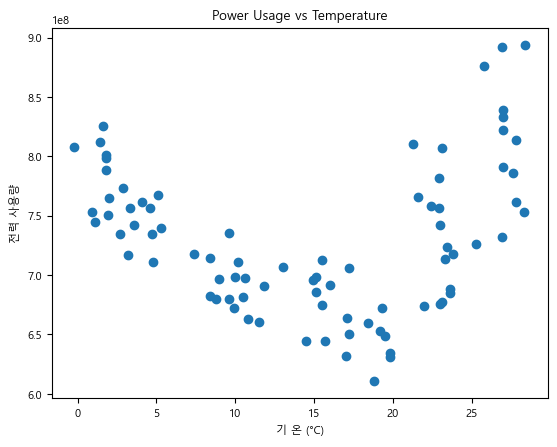

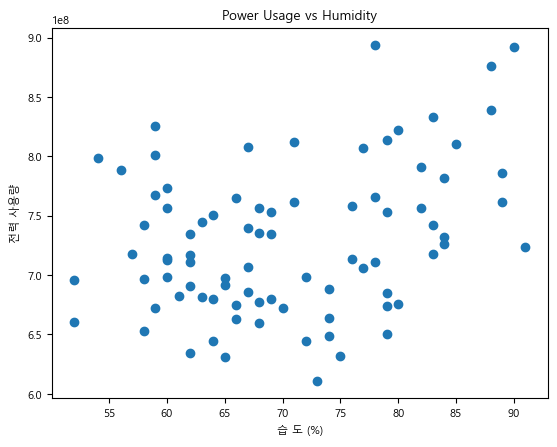

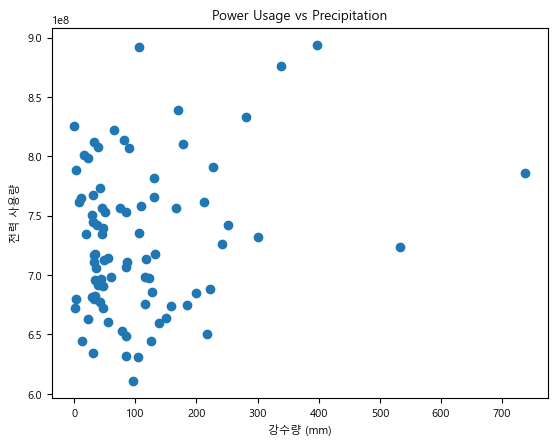

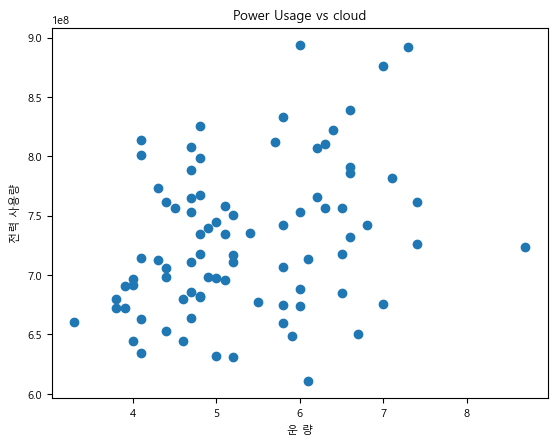

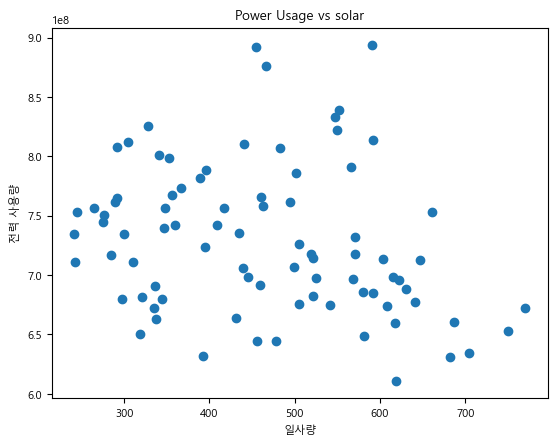

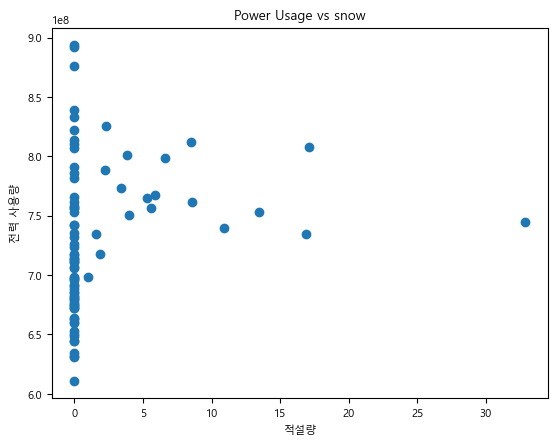

In [7]:
if platform.system() == 'Windows':  # 현재 운영체제가 Windows인 경우
    # 폰트 파일 경로를 지정
    # 해당 폰트 파일의 이름 호출
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                            ).get_name()
    # 폰트 이름과 크기를 설정
    rc('font', family=font_name, size=8)

# 기온, 사용량
plt.scatter(kw_df['temp'], kw_df['usage'])
plt.xlabel('기 온 (°C)')
plt.ylabel('전력 사용량')
plt.title('Power Usage vs Temperature')
plt.show()

# 습도, 사용량
plt.scatter(kw_df['Humidity_mean'], kw_df['usage'])
plt.xlabel('습 도 (%)')
plt.ylabel('전력 사용량')
plt.title('Power Usage vs Humidity')
plt.show()

# 강수량, 사용량
plt.scatter(kw_df['rainfall_total'], kw_df['usage'])
plt.xlabel('강수량 (mm)')
plt.ylabel('전력 사용량')
plt.title('Power Usage vs Precipitation')
plt.show()

# 운량, 사용량
plt.scatter(kw_df['cloud'], kw_df['usage'])
plt.xlabel('운 량')
plt.ylabel('전력 사용량')
plt.title('Power Usage vs cloud')
plt.show()

# 일사량, 사용량
plt.scatter(kw_df['solar'], kw_df['usage'])
plt.xlabel('일사량')
plt.ylabel('전력 사용량')
plt.title('Power Usage vs solar')
plt.show()

# 적설량, 사용량
plt.scatter(kw_df['snow'], kw_df['usage'])
plt.xlabel('적설량')
plt.ylabel('전력 사용량')
plt.title('Power Usage vs snow')
plt.show()

In [8]:
import plotly.graph_objs as go

## x축: 기온, y축: 전력량,
## 원크기: 습도, 색상: 강수량

In [9]:
# Scatter plot 생성
scatter = go.Scatter(x=kw_df['temp'], y=kw_df['usage'], mode='markers', 
                     marker=dict(size=kw_df['Humidity_mean'],
                                 color=kw_df['rainfall_total'], colorscale='Viridis'))

# 레이아웃 생성
layout = go.Layout(title='날씨와 전력량에 따른 관계', xaxis={'title': '기온'}, 
                   yaxis={'title': '전력량'}, hovermode='closest')

# 그래프 생성
fig = go.Figure(data=[scatter], layout=layout)

# 그래프 출력
fig.show()


In [23]:
kw_df['usage'].min()

610865447

In [24]:
kw_df.query("usage == 610865447")

,year,month,temp,Humidity_mean,rainfall_total,cloud,solar,snow,usage
52,2020,5,18.8,73,96.8,6.1,619.38,0.0,610865447


In [10]:
# Box plot 생성
box = go.Box(x=kw_df['temp'], y=kw_df['usage'], boxpoints='all')

# 레이아웃 생성
layout = go.Layout(title='날씨와 전력량에 따른 관계', xaxis={'title': '기온'}, 
                   yaxis={'title': '전력량'})

# 그래프 생성
fig = go.Figure(data=[box], layout=layout)

# 그래프 출력
fig.show()

In [11]:
# Heatmap 생성
heatmap = go.Heatmap(x=kw_df['temp'], y=kw_df['usage'], z=kw_df['Humidity_mean'])

# 레이아웃 생성
layout = go.Layout(title='날씨와 전력량 데이터', xaxis={'title': '기온'}, yaxis={'title': '전력량'})

# 그래프 생성
fig = go.Figure(data=[heatmap], layout=layout)

# 그래프 출력
fig.show()

In [12]:
import altair as alt

In [13]:
# Scatter Plot 생성
scatter_plot = alt.Chart(kw_df).mark_point().encode(
    x='temp',
    y='usage',
    color='Humidity_mean'
)

# 그래프 출력
scatter_plot.show()

Displaying chart at http://localhost:59719/


In [14]:
import plotly.express as px

In [15]:

fig = px.scatter(kw_df,
                 x="temp",
                 y="usage",
                 template='plotly_dark',
                 color="Humidity_mean",
                 labels={'temp': '기온', 'usage': '전력량', 'Humidity_mean': '습도'})
fig.show()

In [16]:
# Line plot 생성
line_plot = px.line(kw_df, x='temp', y='usage', color='cloud', 
                    title='날씨와 전력량 데이터', 
                    template='plotly_dark', 
                    labels={'temp': '기온', 'usage': '전력량', 'cloud': '운량'})

# 그래프 출력
line_plot.show()

In [17]:
import plotly.express as px

In [18]:
# Area plot 생성
area_plot = px.area(kw_df, x='temp', y='usage', color='Humidity_mean')

# 그래프 출력
area_plot.show()

c:\Users\admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.

c:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



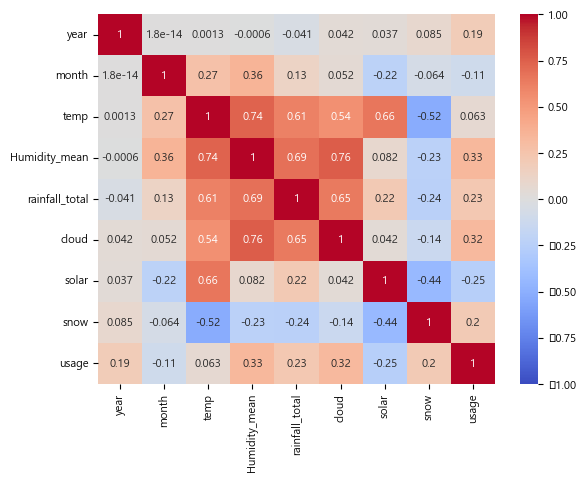

In [19]:
# 상관계수 계산
corr = kw_df.corr()

# Heatmap 생성
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# 그래프 출력
plt.show()